# Plotting PyPSA networks along the workflow

### Jupyter scripts need to be improved

In this script, the ouputs of the PyPSA networks calculated in the Data Workflow are computed.
In particular, the considered outputs are of the following scripts:
- download_osm_data
- clean_osm_data
- osm_build_network
- base_network
- add_electricity
- simplify_network
- cluster_network

In the following, the output networks described by the files are loaded and plotted by using `hvplot` package.
Such package enables a more interactive scouting of the files, which simplifies the learning phase and debugging process, when needed.

## Change the current directory to the main package folder

In [38]:
# Specify the current directory
import sys

sys.path.append("../")  # to import helpers

from scripts._helpers import sets_path_to_root

sets_path_to_root("pypsa-africa")

This is the repository path:  /data/davidef/gitdf/pypsa-africa
Had to go 0 folder(s) up.


## Specify file paths of the files related to the scripts

In [39]:
import os

# file paths of download_osm_data outputs
substations_ODD_path = os.getcwd() + "/data/raw/africa_all_raw_substations.geojson"
lines_ODD_path = os.getcwd() + "/data/raw/africa_all_raw_lines.geojson"
# file paths of clean_osm_data outputs
substations_ODC_path = os.getcwd() + "/data/clean/africa_all_substations.geojson"
lines_ODC_path = os.getcwd() + "/data/clean/africa_all_lines.geojson"
# file paths of osm_build_network outputs
substations_OBN_path = (
    os.getcwd() + "/data/base_network/africa_all_buses_build_network.csv"
)
lines_OBN_path = os.getcwd() + "/data/base_network/africa_all_lines_build_network.csv"
# base_network file path
network_path_b = os.getcwd() + "/networks/base.nc"
# add_electricity file path
network_path_a = os.getcwd() + "/networks/elec.nc"
# simplify_network file path
network_path_s = os.getcwd() + "/networks/elec_s.nc"
# cluster_network file path
network_path_c = os.getcwd() + "/networks/elec_s_10.nc"

## Load python packages

In [40]:
import logging
import os

import pypsa
import yaml
import pandas as pd
import geopandas as gpd
import geoviews as gv
import hvplot.pandas
import numpy as np
import scipy as sp
import networkx as nx
import matplotlib as plt
import holoviews as hv

from scipy.sparse import csgraph
from itertools import product

from shapely.geometry import Point, LineString
import shapely, shapely.prepared
from shapely.wkt import loads

logger = logging.getLogger(__name__)

pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", 70)

## Plot network of download_osm_data

download_osm_data is the script that downloads the raw OSM data
In particular, the main outputs of the script, being the substations and lines data, are loaded and then plotted.
- `df_substations_osm_raw`: is the geodataframe related to the substations
- `df_lines_osm_raw`: is the geodataframe related to the lines

The package `hvplot` enables to zoom in the image and enables to better investigate the result of the analysis.
Therefore, it has been used as detailed below.

In [41]:
# load substation geodataframe
df_substations_osm_raw = gpd.read_file(substations_ODD_path)
# load lines geodataframe
df_lines_osm_raw = gpd.read_file(lines_ODD_path)

# hvplot
hhosmraw = df_substations_osm_raw.hvplot(
    geo=True,
    size=10,  # buses["tag_area"]**(0.5)/10,
    frame_height=750,
    alpha=0.4,
    tiles="CartoLight",
    color="orange",
) * df_lines_osm_raw.hvplot(geo=True, alpha=0.4,).opts(
    active_tools=["pan", "wheel_zoom"]
)

hv.save(hhosmraw, "osm_raw_network.html");

/home/davidef/.conda/envs/pypsa-africa/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/davidef/.conda/envs/pypsa-africa/lib/python3.9/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/davidef/.conda/envs/pypsa-africa/lib/python3.9/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/home/davidef/.conda/envs

## Plot network of clean_osm_data

clean_osm_data is the script that loads the raw OSM data and performs simple cleaning, such as renaming columns to adhere with PyPSA format, cleaning Nones/NaNs, etc.
In particular, the main outputs of the script, being the substations and lines data, are loaded and then plotted.
- `df_substations_osm_clean`: is the geodataframe related to the substations
- `df_lines_osm_clean`: is the geodataframe related to the lines

The package `hvplot` enables to zoom in the image and enables to better investigate the result of the analysis.
Therefore, it has been used as detailed below.

In [42]:
# load substation geodataframe
df_substations_osm_clean = gpd.read_file(substations_ODC_path)
# load lines geodataframe
df_lines_osm_clean = gpd.read_file(lines_ODC_path)

# hvplot
hhosm = df_substations_osm_clean.hvplot(
    geo=True,
    size=10,  # buses["tag_area"]**(0.5)/10,
    frame_height=750,
    alpha=0.4,
    tiles="CartoLight",
    color="orange",
    # hover_cols=['bus_id'],
) * df_lines_osm_clean.hvplot(
    geo=True,
    alpha=0.4,
    # hover_cols=['line_id'],
).opts(
    active_tools=["pan", "wheel_zoom"]
)

hv.save(hhosm, "osm_clean_network.html");

/home/davidef/.conda/envs/pypsa-africa/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/davidef/.conda/envs/pypsa-africa/lib/python3.9/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/davidef/.conda/envs/pypsa-africa/lib/python3.9/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/home/davidef/.conda/envs

## Plot network of osm_build_network

osm_build_network is the script that loads the cleaned OSM data and performs some refinings to prepare the input data that are loaded by the build_base_network
In particular, the main outputs of the script, being the substations and lines data, are loaded and then plotted.
- `df_substations_osm_build`: is the geodataframe related to the substations
- `df_lines_osm_build`: is the geodataframe related to the lines

The package `hvplot` enables to zoom in the image and enables to better investigate the result of the analysis.
Therefore, it has been used as detailed below.

In [43]:
# load substations
substations_OBN = gpd.read_file(
    substations_OBN_path, GEOM_POSSIBLE_NAMES="geometry", KEEP_GEOM_COLUMNS="NO"
)
substations_OBN["geometry"] = gpd.points_from_xy(
    pd.to_numeric(substations_OBN.lon, downcast="float"),
    pd.to_numeric(substations_OBN.lat, downcast="float"),
)
substations_OBN = substations_OBN.set_crs(epsg=4326, inplace=True)
# load lines
lines_OBN = gpd.read_file(
    lines_OBN_path, GEOM_POSSIBLE_NAMES="geometry", KEEP_GEOM_COLUMNS="NO"
).set_crs(epsg=4326, inplace=True)


# hvplot
hho = substations_OBN.hvplot(
    geo=True,
    size=10,  # buses["tag_area"]**(0.5)/10,
    frame_height=750,
    alpha=0.4,
    tiles="CartoLight",
    color="orange",
    # hover_cols=['bus_id']
) * lines_OBN.hvplot(
    geo=True,
    alpha=0.4,
    # hover_cols='line_id'
).opts(
    active_tools=["pan", "wheel_zoom"]
)

hv.save(hho, "osm_build_network.html");

/home/davidef/.conda/envs/pypsa-africa/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/davidef/.conda/envs/pypsa-africa/lib/python3.9/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/davidef/.conda/envs/pypsa-africa/lib/python3.9/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/home/davidef/.conda/envs

## Plot network of base_network

`base_network` is the script that loads the cleaned OSM data, thus the map shown above, and prepare a preliminary PyPSA model that is later used by all scripts downstream the workflow.
In particular, in order to compare the network structure, the substations and lines datasets are loaded
- `n_b` is the main PyPSA network model related to `base_network`
- `n_b.buses` is the geodataframe related to the substations
- `n_b.lines` is the geodataframe related to the lines

The package `hvplot` is used to show the model.

In [44]:
# base_network PyPSA model
n_b = pypsa.Network(network_path_b)

# lines dataframe
lines_b = n_b.lines
lines_b["geometry"] = lines_b["geometry"].apply(loads)
lines_b = gpd.GeoDataFrame(lines_b, crs="epsg:4326")

# buses dataframe
buses_b = n_b.buses
buses_b["geometry"] = gpd.points_from_xy(buses_b.lon, buses_b.lat)
buses_b = gpd.GeoDataFrame(buses_b, crs="epsg:4326")

# hvplot
hhb = buses_b.hvplot(
    geo=True,
    size=10,  # buses["tag_area"]**(0.5)/10,
    frame_height=750,
    alpha=0.4,
    tiles="CartoLight",
    color="orange",
) * lines_b.hvplot(geo=True, alpha=0.4).opts(active_tools=["pan", "wheel_zoom"])

hv.save(hhb, "base_network.html");

INFO:pypsa.io:Imported network base.nc has buses, lines
/home/davidef/.conda/envs/pypsa-africa/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/davidef/.conda/envs/pypsa-africa/lib/python3.9/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/davidef/.conda/envs/pypsa-africa/lib/python3.9/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part ge

## Plot network of add_electricity

`add_electricity` adds generators and load to the `base_network` model, as such no differences are expected with respect to the output model of `base_network`

Similarly to the previous cases:
- `n_a` is the PyPSA network model
- `n_a.lines` is the lines dataframe
- `n_a.buses` is the buses dataframe

In [45]:
n_a = pypsa.Network(network_path_a)

# lines dataframe
lines_a = n_a.lines
lines_a["geometry"] = lines_a["geometry"].apply(loads)
lines_a = gpd.GeoDataFrame(lines_a, crs="epsg:4326")

# buses dataframe
buses_a = n_a.buses
buses_a["geometry"] = gpd.points_from_xy(buses_a.lon, buses_a.lat)
buses_a = gpd.GeoDataFrame(buses_a, crs="epsg:4326")

# hvplot
hha = buses_a.hvplot(
    geo=True,
    size=10,  # buses["tag_area"]**(0.5)/10,
    frame_height=750,
    alpha=0.4,
    tiles="CartoLight",
    color="orange",
) * lines_a.hvplot(geo=True, alpha=0.4).opts(active_tools=["pan", "wheel_zoom"])

hv.save(hha, "add_electricity.html");

INFO:pypsa.io:Imported network elec.nc has buses, carriers, generators, lines, loads
/home/davidef/.conda/envs/pypsa-africa/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/davidef/.conda/envs/pypsa-africa/lib/python3.9/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/davidef/.conda/envs/pypsa-africa/lib/python3.9/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  numbe

## Plot network of simplify_network

`simplify_network` modifies the structure of the network obtained from `add_electricity` to remove dead-hends and group disconnected nodes that are not connected with the main network.
The differences between the networks by `simplify_network` and `add_electricity` can be easily scouted by comparing the hvplots of the previous cell and the following.

Similarly to the previous cases:
- `n_s` is the PyPSA network model
- `n_s.lines` is the lines dataframe
- `n_s.buses` is the buses dataframe

INFO:pypsa.io:Imported network elec_s.nc has buses, carriers, generators, lines, loads
/home/davidef/.conda/envs/pypsa-africa/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/davidef/.conda/envs/pypsa-africa/lib/python3.9/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/davidef/.conda/envs/pypsa-africa/lib/python3.9/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  num

<AxesSubplot:>

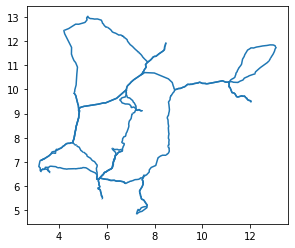

In [46]:
n_s = pypsa.Network(network_path_s)

# lines dataframe
lines_s = n_s.lines
lines_s["geometry"] = lines_s["geometry"].apply(loads)
lines_s = gpd.GeoDataFrame(lines_s, crs="epsg:4326")

# buses dataframe
buses_s = n_s.buses
buses_s["geometry"] = gpd.points_from_xy(buses_s.lon, buses_s.lat)
buses_s = gpd.GeoDataFrame(buses_s, crs="epsg:4326")

# hvplot
hhs = buses_s.hvplot(
    geo=True,
    size=10,  # buses["tag_area"]**(0.5)/10,
    frame_height=750,
    alpha=0.4,
    tiles="CartoLight",
    color="orange",
) * lines_s.hvplot(geo=True, alpha=0.4).opts(active_tools=["pan", "wheel_zoom"])

hv.save(hhs, "simplified_cluster.html")

lines_s.plot()

<AxesSubplot:>

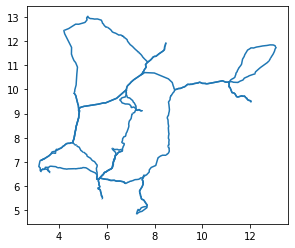

In [47]:
lines_s.plot()

## Plot network of cluster_network

`cluster_network` modifies the structure of the network obtained from `simplify_network` to aggregate close nodes and reduce the size of the problem as specified by the configuration file ``config.yaml``.
The differences between the networks by `cluster_network` and `simplify_network` can be easily scouted by comparing the hvplots of the previous cell and the following.

Similarly to the previous cases:
- `n_c` is the PyPSA network model
- `n_c.lines` is the lines dataframe
- `n_c.buses` is the buses dataframe

In [48]:
n_c = pypsa.Network(network_path_c)

# buses dataframe
buses_c = n_c.buses
buses_c["geometry"] = gpd.points_from_xy(buses_c.x, buses_c.y)
buses_c = gpd.GeoDataFrame(buses_c, crs="epsg:4326")

# lines dataframe
lines_c = n_c.lines
lines_c["geometry"] = lines_c.apply(
    lambda x: LineString(
        [buses_c.loc[x["bus0"], "geometry"], buses_c.loc[x["bus1"], "geometry"]]
    ),
    axis=1,
)
lines_c = gpd.GeoDataFrame(lines_c, crs="epsg:4326")

# hvplot
hhc = buses_c.hvplot(
    geo=True,
    size=10,  # buses["tag_area"]**(0.5)/10,
    frame_height=750,
    alpha=0.4,
    tiles="CartoLight",
    color="orange",
) * lines_c.hvplot(geo=True, alpha=0.4).opts(active_tools=["pan", "wheel_zoom"])

hv.save(hhc, "network_cluster.html");

FileNotFoundError: [Errno 2] No such file or directory: b'/data/davidef/gitdf/pypsa-africa/networks/elec_s_10.nc'